**<center><h1>Human Activity Recognition Using Radar Image Processing</h1></center>**

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import gc   #garbage collector

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %ls /content/drive/MyDrive

In [ ]:
crawling_dir = '/content/drive/MyDrive/DIAT-RadHAR/Army crawling'

jogging_dir ='/content/drive/MyDrive/DIAT-RadHAR/Army jogging'

marching_dir = '/content/drive/My Drive/DIAT-RadHAR/Army marching'

jumpGun_dir = '/content/drive/My Drive/DIAT-RadHAR/Jumping with holding a gun'

stone_dir = '/content/drive/My Drive//DIAT-RadHAR/Stone pelting-Grenades throwing'

In [ ]:
# Freeing up memory between loops
def memclear():
    cleared = gc.collect()
    print(cleared)

In [ ]:
# Preprocessing Images
def resize_img(image):
  resized_im = cv2.resize(img, (224, 224))

  return resized_im

In [ ]:
crawling = []

folder_path = crawling_dir

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        img = resize_img(img)
        crawling.append(img)

In [ ]:
jogging = []

folder_path = jogging_dir

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        img = resize_img(img)
        jogging.append(img)

In [ ]:
marching = []

folder_path = jogging_dir

for filename in os.listdir(folder_path):
    img2 = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        img = resize_img(img)
        marching.append(img)

In [ ]:
stone = []

folder_path = stone_dir

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        img = resize_img(img)
        stone.append(img)

In [ ]:
jumpGun = []

folder_path = jumpGun_dir

for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    if img is not None:
        img = resize_img(img)
        jumpGun.append(img)

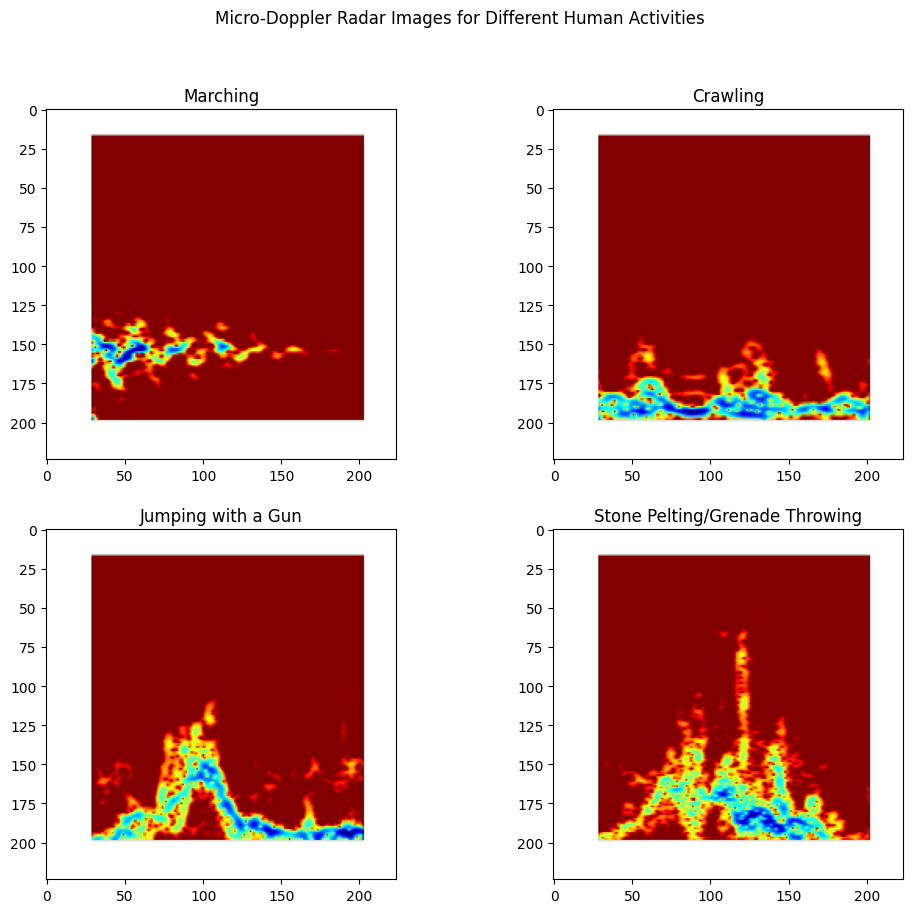

In [ ]:
plt.figure(figsize = (12, 10), dpi=100)

plt.subplot(2, 2, 1)
plt.imshow(marching[0])
plt.title('Marching')

plt.subplot(2, 2, 2)
plt.imshow(crawling[0])
plt.title('Crawling')

plt.subplot(2, 2, 3)
plt.imshow(jumpGun[0])
plt.title('Jumping with a Gun')

plt.subplot(2, 2, 4)
plt.imshow(stone[0])
plt.title('Stone Pelting/Grenade Throwing')

plt.suptitle('Micro-Doppler Radar Images for Different Human Activities')
plt.show()

In [ ]:
# Generating Flips of all the Images for Data Augmentation
# Generating Flips of all the Images for Data Augmentation
crawling_argumented = []
marching_argumented = []
stone_argumented = []
jogging_argumented = []
jumpGun_argumented = []

for img in crawling:
    img = cv2.flip(img, 1)
    crawling_argumented.append(img)


for img in marching:
    img = cv2.flip(img, 1)
    marching_argumented.append(img)



for img in stone:
    img = cv2.flip(img, 1)
    stone_argumented.append(img)


for img in jogging:
    img = cv2.flip(img, 1)
    jogging_argumented.append(img)


for img in jumpGun:
    img = cv2.flip(img, 1)
    jumpGun_argumented.append(img)

# Adding the augmented images to the original arrays
crawling = crawling + crawling_argumented
marching = marching + marching_argumented
stone = stone + stone_argumented
jogging = jogging + jogging_argumented
jumpGun = jumpGun + jumpGun_argumented

print(len(crawling))

1202


In [ ]:
memclear()

13482


In [ ]:
A = np.array([0, 1, 0, 0, 0])
B = np.tile(A, (10, 1, 1))
np.shape(B)

(10, 1, 5)

In [ ]:
# Assingning class-wise labels
crawling = np.array(crawling)
crawl_y = [1, 0, 0, 0, 0]
crawl_y = np.tile(crawl_y, (len(crawling), 1, 1))

jumpGun = np.array(jumpGun)
jumpGun_y = [0, 1, 0, 0, 0]
jumpGun_y = np.tile(jumpGun_y, (len(jumpGun), 1, 1))

stone = np.array(stone)
stone_y = [0, 0, 1, 0, 0]
stone_y = np.tile(stone_y, (len(stone), 1, 1))

marching = np.array(marching)
march_y = [0, 0, 0, 1, 0]
march_y = np.tile(march_y, (len(marching), 1, 1))

jogging = np.array(jogging)
jogging_y = [0, 0, 0, 0, 1]
jogging_y = np.tile(jogging_y, (len(jogging), 1, 1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
crawl_X_train, crawl_X_test, crawl_y_train, crawl_y_test = train_test_split(crawling, crawl_y, test_size=0.20, random_state=101)

jumpGun_X_train, jumpGun_X_test, jumpGun_y_train, jumpGun_y_test = train_test_split(jumpGun, jumpGun_y, test_size=0.20, random_state=101)

stone_X_train, stone_X_test, stone_y_train, stone_y_test = train_test_split(stone, stone_y, test_size=0.20, random_state=101)

marching_X_train, marching_X_test, marching_y_train, marching_y_test = train_test_split(marching, march_y, test_size=0.20, random_state=101)

jogging_X_train, jogging_X_test, jogging_y_train, jogging_y_test = train_test_split(jogging, jogging_y, test_size=0.20, random_state=101)

In [ ]:
# Deleting the earlier variables to free memory
del crawling, stone, marching, jogging, jumpGun, crawl_y, stone_y, march_y, jogging_y, jumpGun_y

In [ ]:
memclear()

0


In [ ]:
X_train = np.concatenate((crawl_X_train, jumpGun_X_train, stone_X_train, marching_X_train, jogging_X_train), axis=0)
X_test = np.concatenate((crawl_X_test, jumpGun_X_test, stone_X_test, marching_X_test, jogging_X_test), axis=0)

y_train = np.concatenate((crawl_y_train, jumpGun_y_train, stone_y_train, marching_y_train, jogging_y_train), axis=0)
y_test = np.concatenate((crawl_y_test, jumpGun_y_test, stone_y_test, marching_y_test, jogging_y_test), axis=0)

In [ ]:
# Random Shuffling of the Training and Testing Data to ensure proper training
train_indices = np.arange(len(X_train))
np.random.shuffle(train_indices)

test_indices = np.arange(len(X_test))
np.random.shuffle(test_indices)

X_train = X_train[train_indices]
y_train = y_train[train_indices]
y_train = np.reshape(y_train, (len(y_train), 5))

X_test = X_test[test_indices]
y_test = y_test[test_indices]
y_test = np.reshape(y_test, (len(y_test), 5))

In [ ]:
np.shape(X_train)

(4917, 224, 224, 3)

In [ ]:
np.shape(y_train)

(4917, 5)

In [ ]:
np.shape(X_test)

(1231, 224, 224, 3)

In [ ]:
np.shape(y_test)

(1231, 5)

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Fine tuning the last 5 layers of the model
for layer in base_model.layers[:]:
    layer.trainable = False

# Adding Linear Layeres at the end of the model
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

# Create a new model that outputs just the probabilities
model = Model(inputs=base_model.input, outputs = output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

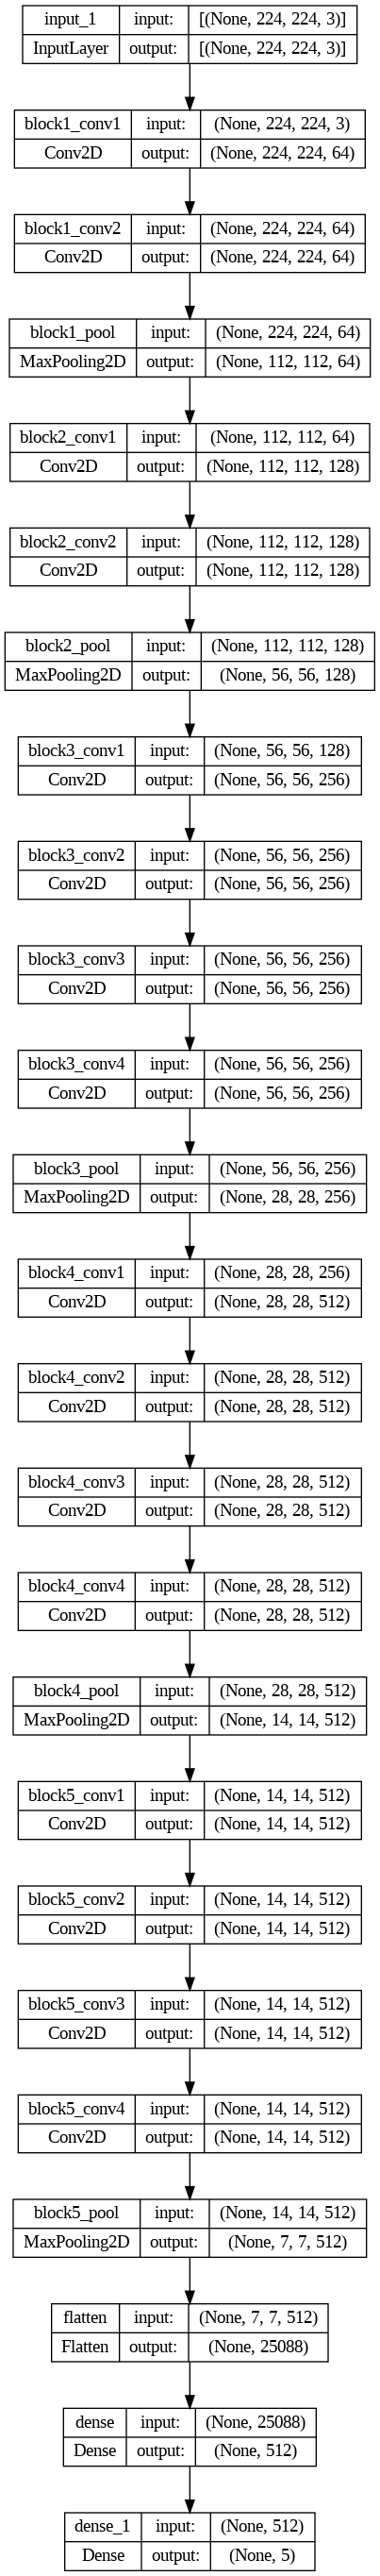

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1, validation_data = (X_test, y_test))
history

Epoch 1/5
154/154 [==============================] - 47s 209ms/step - loss: 0.3974 - accuracy: 0.9573 - val_loss: 0.2351 - val_accuracy: 0.9813
Epoch 2/5
154/154 [==============================] - 32s 206ms/step - loss: 0.0635 - accuracy: 0.9925 - val_loss: 0.0710 - val_accuracy: 0.9927
Epoch 3/5
154/154 [==============================] - 32s 207ms/step - loss: 0.0642 - accuracy: 0.9939 - val_loss: 0.1964 - val_accuracy: 0.9805
Epoch 4/5
154/154 [==============================] - 32s 208ms/step - loss: 0.0511 - accuracy: 0.9953 - val_loss: 0.0599 - val_accuracy: 0.9911
Epoch 5/5
154/154 [==============================] - 32s 209ms/step - loss: 0.0389 - accuracy: 0.9957 - val_loss: 0.0844 - val_accuracy: 0.9951


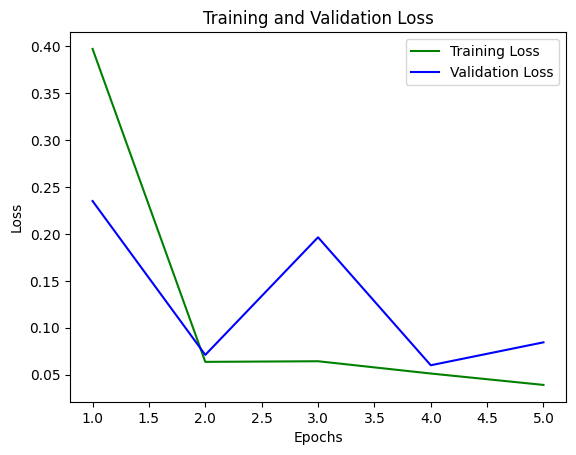

In [ ]:
# Extract loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a plot
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'g', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

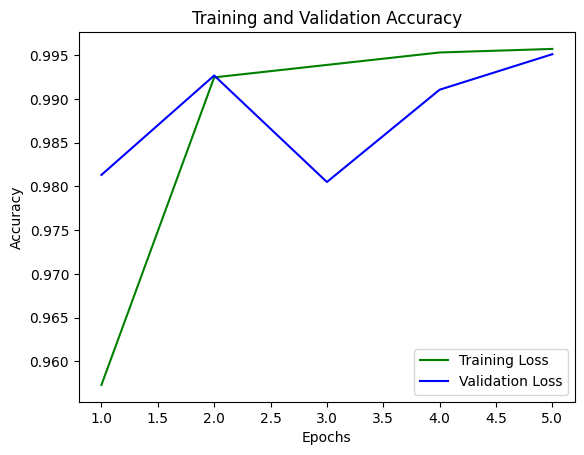

In [ ]:
# Extract loss values
training_loss = history.history['accuracy']
validation_loss = history.history['val_accuracy']

# Create a plot
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'g', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# np.shape(X_test[0])

(224, 224, 3)

In [ ]:
y_pred = model.predict(X_test)

39/39 [==============================] - 5s 135ms/step


In [ ]:
y_pred = np.round(y_pred)
# y_pred

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
def text_pred(pred):

  if pred[0] == 1.0:
    pred = 'Crawling Detected'

  elif pred[1] == 1.0:
    pred = 'Detected Jumping (Weapons possible)'

  elif pred[2] == 1.0:
    pred = 'Possible Stone Pelting/Grenade Throw'

  elif pred[3] == 1.0:
    pred = 'Suspicious Marching Targets'

  elif pred[4] == 1.0:
    pred = 'Suspicious Running Targets'

  return pred

Text(0.5, 0.98, 'Model Results for various test cases')

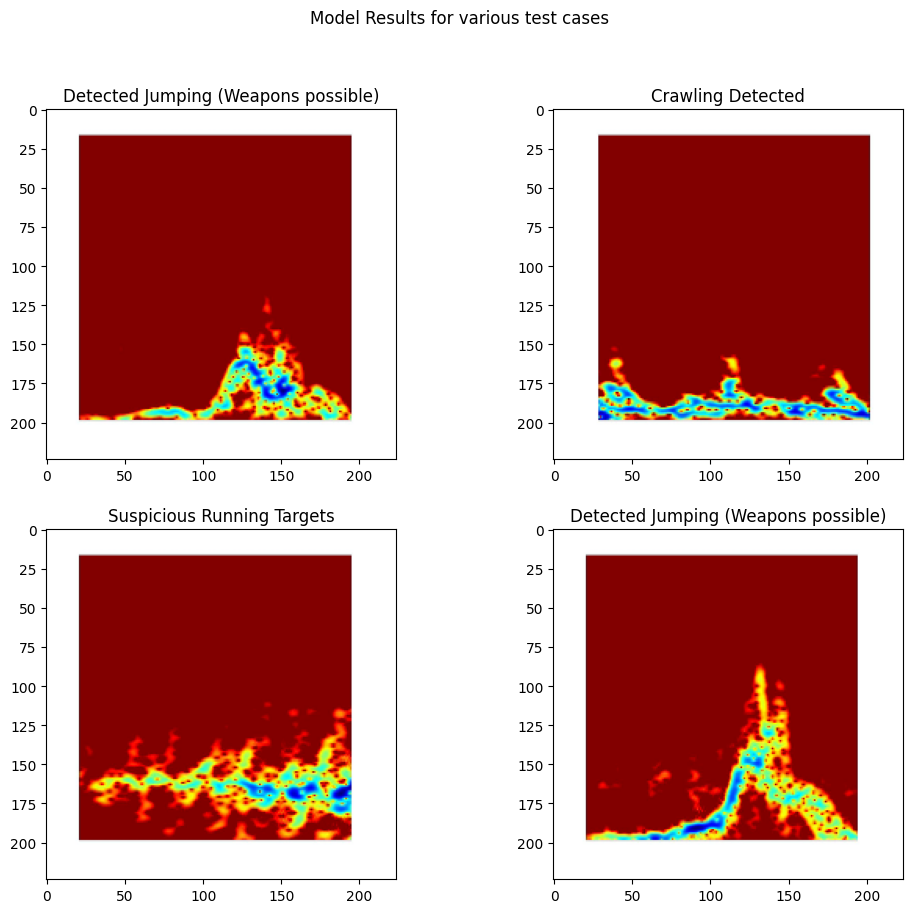

In [ ]:
plt.figure(figsize=(12, 10), dpi=100)

plt.subplot(2, 2, 1)
img1 = X_test[0]
plt.title(text_pred(y_pred[0]))
plt.imshow(img1)

plt.subplot(2, 2, 2)
img2 = X_test[2]
plt.title(text_pred(y_pred[2]))
plt.imshow(img2)

plt.subplot(2, 2, 3)
img3= X_test[3]
plt.title(text_pred(y_pred[3]))
plt.imshow(img3)

plt.subplot(2, 2, 4)
img4 = X_test[4]
plt.title(text_pred(y_pred[4]))
plt.imshow(img4)

plt.suptitle("Model Results for various test cases")